In [56]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [57]:
df = pd.read_excel('champagne_new.xlsx', index_col = 0)
df.head()

,monthly_champange
Month,
1964-01-01,2815
1964-02-01,2672
1964-03-01,2755
1964-04-01,2721
1964-05-01,2946


In [58]:
df.tail()

,monthly_champange
Month,
1972-05-01,4618
1972-06-01,5312
1972-07-01,4298
1972-08-01,1413
1972-09-01,5877


In [59]:
df.index = pd.to_datetime(df.index)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 105 entries, 1964-01-01 to 1972-09-01
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   monthly_champange  105 non-null    int64
dtypes: int64(1)
memory usage: 1.6 KB


[]

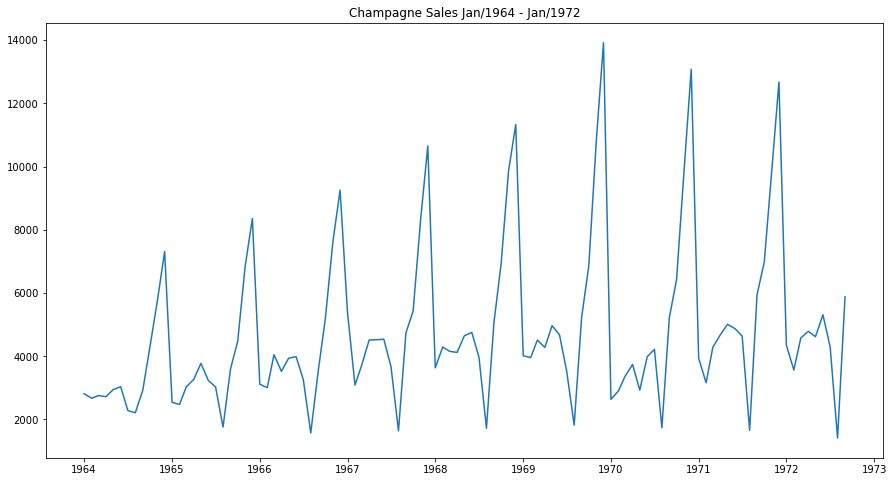

In [61]:
plt.figure(figsize = (15, 8))
plt.plot(df)
plt.title('Champagne Sales Jan/1964 - Jan/1972')
plt.plot()

In [62]:
result = seasonal_decompose(df, model = 'multiplicative')
result

[]

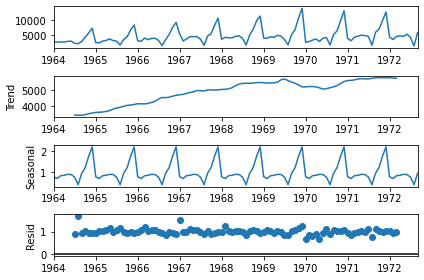

In [63]:
result.plot()
plt.plot()

*Dữ liệu biến động theo mùa, tăng giảm phi tuyến tính, xu hướng chung là tăng qua các năm*

In [64]:
stepwise_model = auto_arima(df, start_p=2, start_q=2,
                           max_p=5, max_q=5, m=12,
                           start_P=1, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print('AIC of the best model: ',stepwise_model.aic())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[12]             : AIC=inf, Time=2.58 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1524.662, Time=0.05 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1507.071, Time=2.37 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1490.517, Time=0.70 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=1491.853, Time=0.18 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=1491.669, Time=0.86 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=1491.700, Time=7.82 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1490.003, Time=0.47 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=1491.649, Time=2.51 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=inf, Time=12.84 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=1516.612, Time=0.17 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=1485.190, Time=0.90 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=1488.819, Time=0.38 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=1486.738, Time=3.37 sec
 ARIMA(1,1,1)(1,1,1)[12]    

In [65]:
train = df.loc['1964-01-01': '1970-07-01']
test = df.loc['1970-08-01':]

print('Train size:', len(train), '\t\t\t Test size:', len(test))
print('Test size percentage:', round(len(test)/df.shape[0], 2))

Train size: 79 			 Test size: 26
Test size percentage: 0.25


In [66]:
stepwise_model.fit(train)

ARIMA(order=(1, 1, 1), scoring_args={}, seasonal_order=(1, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [67]:
future_forecast = stepwise_model.predict(n_periods=len(test))

In [68]:
future_forecast = pd.DataFrame(future_forecast, index = test.index, columns = ['Prediction'])

[]

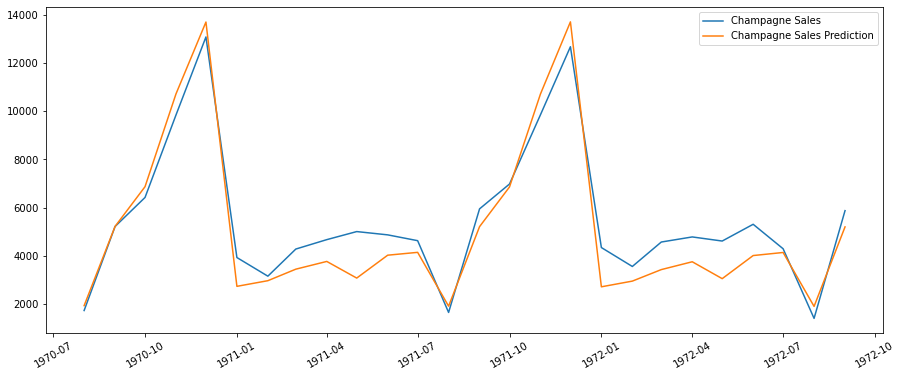

In [69]:
plt.figure(figsize = (15, 6))
plt.plot(test, label = 'Champagne Sales')
plt.plot(future_forecast, label = 'Champagne Sales Prediction')
plt.xticks(rotation = 30)
plt.legend(loc = 'best')
plt.plot()

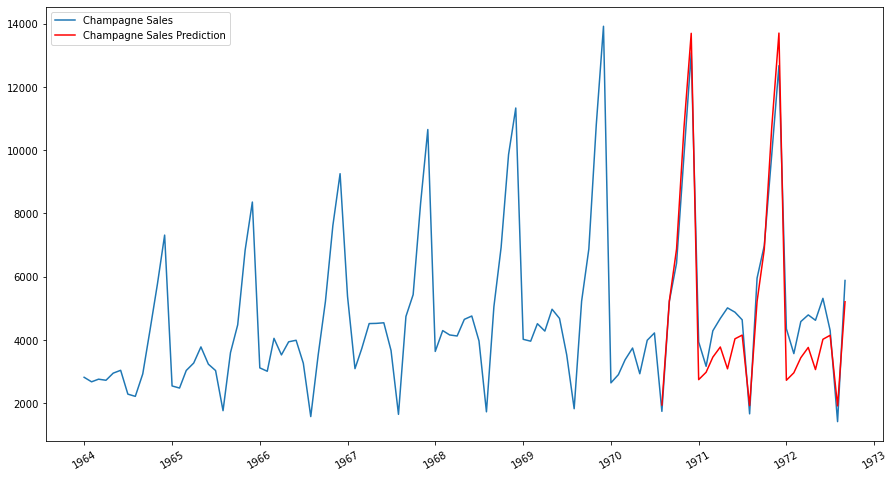

In [70]:
plt.figure(figsize = (15,8))
plt.plot(df, label = 'Champagne Sales')
plt.plot(future_forecast, label = 'Champagne Sales Prediction', color = 'red')
plt.xticks(rotation = 30)
plt.legend()
plt.show()

In [71]:
R_test = r2_score(test, future_forecast[0:len(test)])
mae = mean_absolute_error(test, future_forecast[0:len(test)])
print('R^2 Test:', R_test*100, '%')
print('MAE Test:', mae)

R^2 Test: 89.96812072380787 %
MAE Test: 773.3991253402294


In [72]:
future_forecast_9 = stepwise_model.predict(n_periods=len(test) + 9)

In [73]:
future_forecast_9

array([ 1940.04729549,  5225.1787933 ,  6870.88235002, 10715.67111579,
       13693.32060253,  2740.77227116,  2974.59173444,  3452.30239549,
        3772.80809323,  3083.1293755 ,  4031.50855463,  4149.01984815,
        1919.17950851,  5213.80542055,  6859.86103325, 10711.71405901,
       13700.45434183,  2721.32002118,  2957.28475149,  3434.44553229,
        3759.00685716,  3059.2230341 ,  4016.66662633,  4143.47733121,
        1909.77654348,  5203.62447094,  6849.65123572, 10700.92540688,
       13688.75689552,  2711.80106521,  2947.59000957,  3424.79584827,
        3749.02484981,  3050.06905214,  4006.76989465])

[]

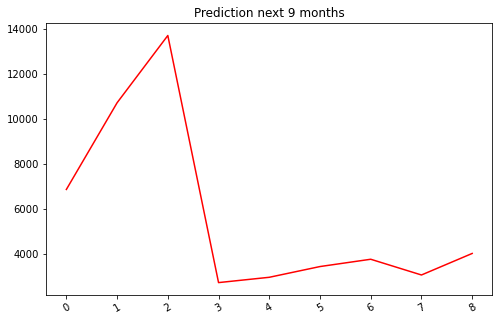

In [74]:
plt.figure(figsize = (8,5))
plt.plot(future_forecast_9[len(test):], color = 'red')
plt.xticks(rotation = 30)
plt.title('Prediction next 9 months')
plt.plot()

In [75]:
months = pd.date_range('1972-10-01', '1973-06-01', freq = 'MS').strftime("%Y-%m-%d").tolist()

In [76]:
future_forecast_9 = pd.DataFrame({'DATE': months,
                                   'Sales Next 9 Months':future_forecast_9[len(test):]})

In [77]:
future_forecast_9.set_index('DATE', inplace = True)

In [78]:
future_forecast_9.index = pd.to_datetime(future_forecast_9.index)

In [79]:
future_forecast_9

,Sales Next 9 Months
DATE,
1972-10-01,6849.651236
1972-11-01,10700.925407
1972-12-01,13688.756896
1973-01-01,2711.801065
1973-02-01,2947.590010
1973-03-01,3424.795848
1973-04-01,3749.024850
1973-05-01,3050.069052
1973-06-01,4006.769895


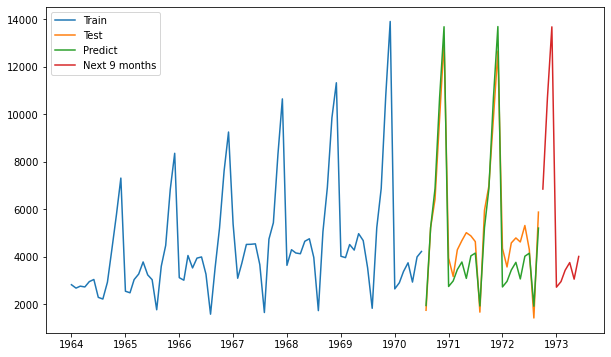

In [80]:
plt.figure(figsize = (10,6))
plt.plot(train.index, train, label = 'Train')
plt.plot(test.index, test, label = 'Test')
plt.plot(future_forecast.index, future_forecast, label = 'Predict')
plt.plot(future_forecast_9.index, future_forecast_9['Sales Next 9 Months'], label = 'Next 9 months')
plt.legend(loc = 'best')